In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data  = pd.read_csv('spam.csv' ,encoding= 'latin_1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
list_drop = ['Unnamed: 3' ,'Unnamed: 2' ,'Unnamed: 4']


In [6]:
df=data.drop(list_drop,axis=1)


In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df=df.rename(columns={"v1":"label","v2":"Email"})


In [9]:
df.sample(30)

,label,Email
3345,ham,U're welcome... Caught u using broken english ...
639,ham,I had askd u a question some hours before. Its...
2198,ham,I'm in a movie. Call me 4 wat?
2497,ham,Dai what this da.. Can i send my resume to thi...
3045,ham,So how's the weather over there?
5011,ham,U attend ur driving lesson how many times a wk...
308,spam,TheMob> Check out our newest selection of cont...
5290,ham,Dear where you. Call me
527,ham,Yes! How is a pretty lady like you single?
2040,ham,You always make things bigger than they are


In [10]:
df['Length']=df['Email'].apply(len)


In [11]:
df

,label,Email,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [12]:
df['label'].replace({'spam': 1, 'ham': 0}, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   Email   5572 non-null   object
 2   Length  5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [14]:
df['label' ] =pd.to_numeric(df['label' ])

In [15]:
df.sample(10)

,label,Email,Length
3186,0,Howz that persons story,23
2608,0,Hello madam how are you ?,25
4868,0,1. Tension face 2. Smiling face 3. Waste face ...,158
453,0,Ok i will tell her to stay out. Yeah its been ...,105
2482,0,Pansy! You've been living in a jungle for two ...,101
2219,1,You have WON a guaranteed å£1000 cash or a å£2...,156
57,0,"Sorry, I'll call later in meeting.",34
683,1,Hi I'm sue. I am 20 years old and work as a la...,158
364,0,Good afternoon sunshine! How dawns that day ? ...,160
1726,0,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...,131


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   Email   5572 non-null   object
 2   Length  5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


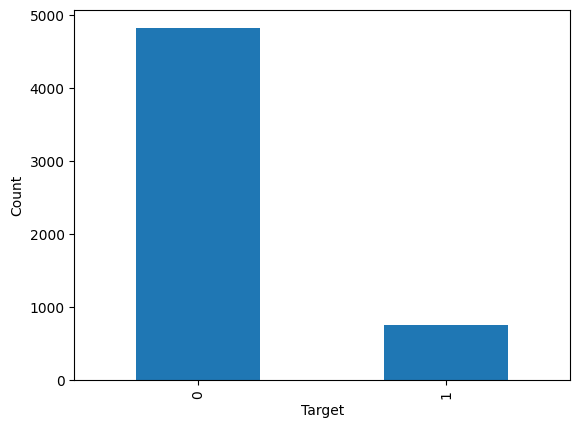

In [17]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [18]:
X_train, X_valid, y_train, y_valid= train_test_split(df['Email'], df['label'], test_size=0.25, random_state=0)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),])

In [21]:
text_clf_nb.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [22]:
predictions = text_clf_nb.predict(X_valid)

In [23]:
from sklearn import metrics
print(metrics.confusion_matrix(y_valid,predictions))

[[1196    0]
 [  71  126]]


In [24]:
print(metrics.classification_report(y_valid,predictions)) 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1196
           1       1.00      0.64      0.78       197

    accuracy                           0.95      1393
   macro avg       0.97      0.82      0.88      1393
weighted avg       0.95      0.95      0.94      1393



In [25]:
print(metrics.accuracy_score(y_valid,predictions))

0.9490308686288585


In [26]:
from sklearn.neural_network import MLPClassifier


In [27]:
text_clf_MIP = Pipeline([('tfidf', TfidfVectorizer()),
                     ('mlp_classifier_model',MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) ),])

In [28]:
text_clf_MIP.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('mlp_classifier_model',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000))])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [30]:
prediction = text_clf_MIP.predict(X_valid)


In [31]:

print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_valid, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_valid, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_valid, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_valid, prediction)))

MLP Classifier
Accuracy score: 0.99
Precision score: 0.99
Recall score: 0.91
F1 score: 0.95


In [32]:
from sklearn.metrics import confusion_matrix


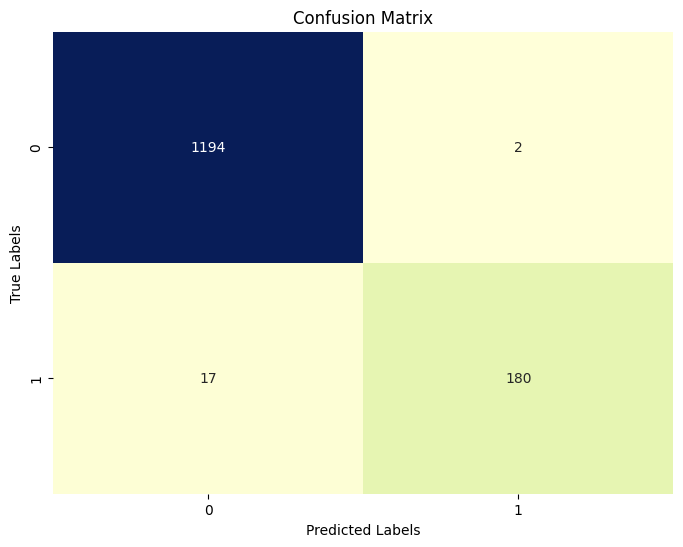

In [33]:
conf_matrix = confusion_matrix(y_valid, prediction)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [34]:
import joblib


In [73]:
# Save the pipeline
joblib.dump(text_clf_MIP, 'text_clf_MIP_model.pkl')

# Load the pipeline
loaded_model = joblib.load('text_clf_MIP_model.pkl')